In [9]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.8 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.8/38.8 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.8 MB 17.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.3/38.8 MB 28.4 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.8 MB 34.6 MB/s eta 0:00:01
   ------------- -------------------------- 13.4/38.8 MB 81.8 MB/s eta 0:00:01
   ----------------- ---------------------- 16.8/38.8 MB 93.9 MB/s eta 0:00:01
   --------------------- ------------------ 21.0/38.8 MB 81.8 MB/s eta 0:00:01
   -------------------------- ------------- 25.3/38.8 MB 81.8 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.8 MB 93.0 MB/s eta 0:00:01
   ----------------------------------- ---- 34.4/38.8 MB 93.9 MB/s eta

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard



In [67]:
NAME = "bee-vs-vaps-64x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [5]:
DATADIR = "C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/bee/archive/bee"


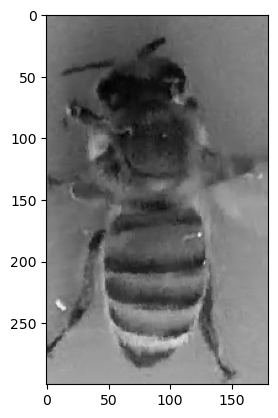

In [7]:
CATEGORIES = ["bee2", "wasp2"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#2d image
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # padaro foto pilka
        plt.imshow(img_array, cmap="gray")

        plt.show()
        break
    break
    
#padaro visas foto vienodos formos

In [9]:
print(img_array)

[[110 109 108 ... 111 111 111]
 [109 108 107 ... 112 112 112]
 [109 109 108 ... 112 112 112]
 ...
 [130 131 131 ... 129 129 129]
 [131 131 131 ... 129 129 129]
 [131 131 131 ... 128 128 128]]


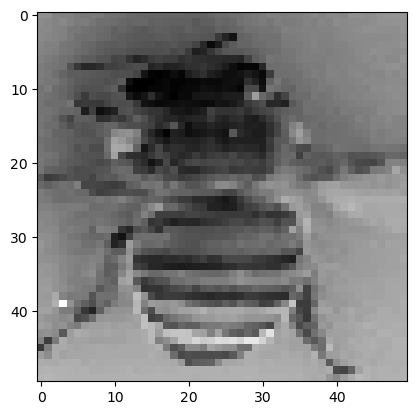

In [11]:
IMG_SIZE = 50 # nuotrauku dydis
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap = "gray")
plt.show()

In [73]:
training_data =[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)#2d image
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # padaro foto pilka
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass #jai nuotrauka netikema bus praleisa
create_training_data()


In [74]:
print(len(training_data))

3530


In [77]:
import random #sumisis foto kad ai nesimokintu vieno tipo foto

random.shuffle(training_data)

In [79]:
for sample in training_data [:10]:
    print(sample[1])

0
1
1
1
1
1
1
0
1
0


In [81]:
x = []
y = []

In [83]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x). reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [85]:

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [87]:
x = np.array(x)
y = np.array(y)


x = pickle.load(open("x.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

x = np.array(x) / 255.0
y= np.array(y)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"Adjusted x shape: {x.shape}")
print(f"Adjusted y shape: {y.shape}")



x shape: (3530, 50, 50, 1)
y shape: (3530,)
Adjusted x shape: (3530, 50, 50, 1)
Adjusted y shape: (3530,)


In [89]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [91]:

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [93]:
print(len(x), len(y))

if len(x) > len(y):
    x = x[:len(y)]  
elif len(y) > len(x):
    y = y[:len(x)] 

model.fit(x, y, batch_size=32, epochs=20, validation_split=0.1, callbacks = [tensorboard])



3530 3530
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7975 - loss: 0.3310 - val_accuracy: 0.9802 - val_loss: 0.0791
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9927 - loss: 0.0252 - val_accuracy: 0.9887 - val_loss: 0.0344
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9879 - loss: 0.0342 - val_accuracy: 0.9830 - val_loss: 0.0604
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9901 - loss: 0.0249 - val_accuracy: 0.9830 - val_loss: 0.0539
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9927 - loss: 0.0178 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9944 - loss: 0.0201 - val_accuracy: 0.9915 - val_loss: 0.0279
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9887 - val_loss: 0.0266
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9968 - loss: 0.0095 

In [49]:
pickle_in = open("x.pickle", "rb")
X = pickle.load(pickle_in)

In [51]:
x[1]


array([[[0.87843137],
        [0.87058824],
        [0.8627451 ],
        ...,
        [0.57254902],
        [0.60784314],
        [0.10588235]],

       [[0.87843137],
        [0.87843137],
        [0.87843137],
        ...,
        [0.7372549 ],
        [0.62745098],
        [0.15294118]],

       [[0.88235294],
        [0.88235294],
        [0.88235294],
        ...,
        [0.74117647],
        [0.65098039],
        [0.25882353]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]])